<center> Bruno Luvizotto Carli </center>
<p style="text-align:center;"> Universidade Federal do Paraná </p>
<p style="text-align:right;"> 2021 </p>

<br />
<hr />
<br />

<h3> Introdução </h3>

<p style="text-align:justify;">
O presente artigo pretende investigar os resultados da aplicação de técnicas depré-processamento de dados sob uma base de dados de fonte pública. O tema escolhido foi Infecções confirmadas por Covid-19 no Município de Curitiba.A prefeitura disponibiliza uma base de dados Oliveira (2021),de casos confirmados da doença, de onde se pretende extrair os dados, identificar uma variável preditora, aplicar um modelo de machine learning e identificar os resultados de melhoria que as técnicas de escalonamento e padronização dos dados na fase de pré-processamento podem propiciar ao modelo.
</p>

<br />

<h3> Trabalhos relacionados </h3>

<p style="text-align:justify;">
    Rizatti <i>et al</i>. (2020) realizaram um mapeamento da pandemia em Santa Maria/RS ao qual apresentou ideias enaltecedoras na resolução da visualização do nível de infecção nas zonas urbanas da cidade, motivação suficiente para buscar a geolocalização dos distritos utilizados na base de dados deste trabalho a fim de promover uma ilustração semelhante par aa cidade de Curitiba.
</p>

<p style="text-align:justify;">
Porém a essência da proposta deste trabalho somente pode se desenrolar sob a luz iluminadora de Guizelini et al. (2020) cujo foi a maçã de newton para este estudo, possibilitando revelar a variável preditora escondida como agulha no palheiro dos dados escolhidos para o estudo. Guizelini et al. (2020) do Laboratório de Inteligência Artificial Aplicada a Bioinformática (AIBIA) da Universidade Federal do Paraná (UFPR) utilizaram algoritmos para prever as <b>médias móveis</b> de casos de infecção por Covid no territorio nacional. Estes, justificam a usabilidade dos dados escolhidos, cujos apresentaram grande resiliência à análise, cabendo ao pesquisador desbobrar os dados para a extração da informação que será utilizada como combustível dos algoritmos de machine learning e consequentemente, ilustrar a porposta deste trabalho: avaliar a influência da padronização e escalonamento dos dados sob o resultado da previsão do modelo.
</p>


### Bibliotecas utilizadas

In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix

### Base de dados

<p style="text-align:justify;">
    A base de dados utilizada foi a <b>Casos de COVID-19 em Curitiba</b> Oliveira (2021), cuja possui 234125 instâncias para 7 colunas de características, das quais descreve-se a data de notificação, idade, gênero, região sanitária (bairro), data de óbito (se em caso de óbito) e estado do indivíduo (se recuperado ou óbito). Todos as ocorrências são casos em que a doença foi confirmada.
</p>

In [2]:
# df = pd.read_csv('2021-06-24_Casos_Covid_19_-_Base_de_Dados.csv', sep=';')
# df.columns = ['notification_date', 'class', 'age',
#               'gender', 'district', 'death_date', 'status', '_']
# df.drop(columns='_', inplace=True)
# df

df = pd.read_csv('2021-07-01_Casos_Covid_19_-_Base_de_Dados.csv', sep=',', encoding='UTF-8')
df.columns = ['notification_date', 'class', 'age',
              'gender', 'district', 'death_date', 'status']

df

,notification_date,class,age,gender,district,death_date,status
0,11/03/2020,CONFIRMADO,54.0,M,DSMZ,NaN,RECUPERADO
1,12/03/2020,CONFIRMADO,58.0,M,DSMZ,NaN,RECUPERADO
2,12/03/2020,CONFIRMADO,25.0,F,DSMZ,NaN,RECUPERADO
3,12/03/2020,CONFIRMADO,15.0,M,DSBQ,NaN,RECUPERADO
4,12/03/2020,CONFIRMADO,43.0,M,DSBQ,NaN,RECUPERADO
...,...,...,...,...,...,...,...
239706,25/06/2021,CONFIRMADO,33.0,F,DSPR,NaN,NaN
239707,25/06/2021,CONFIRMADO,67.0,M,DSSF,NaN,NaN
239708,25/06/2021,CONFIRMADO,77.0,M,DSSF,NaN,NaN
239709,25/06/2021,CONFIRMADO,69.0,F,DSSF,NaN,NaN


<small><center> Tabela 1: Dados brutos. Fonte: Oliveira (2021) </center></small>

In [3]:
print("Shape: ", df.shape)

Shape:  (239711, 7)


In [4]:
print("Unique values in every column \n"+'-'*25)
for i in df.columns:
    print("\t"+i+" = ",len(set(df[i])))

Unique values in every column 
-------------------------
	notification_date =  473
	class =  1
	age =  109
	gender =  4
	district =  11
	death_date =  423
	status =  3


O atributo `class`, cujo descreve se a notificação corresponde à um caso confirmado de covid, apresenta o mesmo valor para todas as instâncias, logo, esta é uma característica desnecessária podendo ser descartada.

In [5]:
df.drop(columns=['class'], inplace=True)

A base de dados apresenta tipagem irregular, cabendo uma limpeza inicial dos dados, pode-se verificar a irregularidade ao analizar incial da base de dados, revelando que todos os dados são do tipo `object`:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239711 entries, 0 to 239710
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   notification_date  239711 non-null  object 
 1   age                239709 non-null  float64
 2   gender             239711 non-null  object 
 3   district           226204 non-null  object 
 4   death_date         6134 non-null    object 
 5   status             232124 non-null  object 
dtypes: float64(1), object(5)
memory usage: 11.0+ MB


Ao verificar por linhas que contém valores ausentes, determinou-se que a coluna idade apresenta duas linhas à qual não contém a informação, portanto pode-se remover estas linhas. As colunas `district` e `status` apresenta muitos dados para que seja removido, podendo impactar nos resultados. A coluna `death_date` e `status` apresentam ausencia devido a binaridade da informação, pois as ocorrências que não apresentam data de óbito, consequentemente, não foram a óbito, portanto optou-se por manter estes registros, removendo apenas as instâncias com dados ausentes para idade.

In [8]:
df.isnull().sum()

notification_date         0
age                       2
gender                    0
district              13507
death_date           233577
status                 7587
dtype: int64

In [9]:
# drop null age rows
df.dropna(subset = ["age"], inplace=True)
print(df.isnull().sum())

notification_date         0
age                       0
gender                    0
district              13507
death_date           233575
status                 7587
dtype: int64


In [10]:
districts = []
for district in df.district.values:
    if district is np.nan:
        districts.append('UNKNOWN')
    else:
        districts.append(district)
df['district'] = districts

Para os dados de idade, foi necessário realizar um *casting* para inteiro.

In [11]:
# all ages to int
ages = []
for i in df.age.values:
    try:
        age = int(i)
    except ValueError as e:
        age = int(float(str(i).replace(',', '.')))
    except Exception as e:
        print(e)
        age = i
    ages.append(age)
df['age'] = ages

Os gêneros cujos estavam definidos como atributos categóricos (`M` e `F`) foram substituidos por valores binários, sendo `1` para masculino e `0` para feminino.

In [12]:
# all genders to binary
def gender_2bin(char):
    return 1 if char.lower() == 'm' else 0

genders = [gender_2bin(char) for char in df.gender.values]
df['gender'] = genders

O mesmo foi realizado para o *status* final do infectado, onde substituiu-se o `status` por variáveis *dummy* representando se o indivíduo se recuperou ou se foi a óbito.

In [13]:
df[['recovered', 'dead']] = pd.get_dummies(df['status'])
df.drop(columns=['status'], inplace=True)
df

,notification_date,age,gender,district,death_date,recovered,dead
0,11/03/2020,54,1,DSMZ,NaN,1,0
1,12/03/2020,58,1,DSMZ,NaN,1,0
2,12/03/2020,25,0,DSMZ,NaN,1,0
3,12/03/2020,15,1,DSBQ,NaN,1,0
4,12/03/2020,43,1,DSBQ,NaN,1,0
...,...,...,...,...,...,...,...
239706,25/06/2021,33,0,DSPR,NaN,0,0
239707,25/06/2021,67,1,DSSF,NaN,0,0
239708,25/06/2021,77,1,DSSF,NaN,0,0
239709,25/06/2021,69,0,DSSF,NaN,0,0


Uma análise inicial revela que de `234125`, `5984` foram a óbito e `228139` recuperaram-se da doença, ou ainda, pode-se dizer que **2.5%** das incidências resultaram em óbito para **97.4%** de indivíduos que recuperaram-se da infecção.

In [14]:
print('Number of deaths: ', len([i for i in df.dead if i == 1]))
print('Number of recovered: ', len([i for i in df.dead if i == 0]))

Number of deaths:  6134
Number of recovered:  233575


/home/beelzebruno/.virtualenvs/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dead', ylabel='count'>

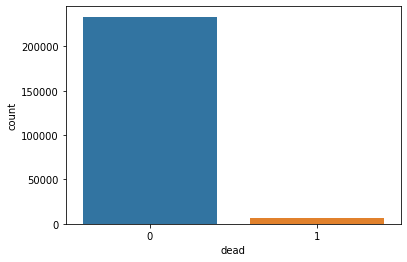

In [15]:
sns.countplot(df['dead'])

Optou-se por particionar a data em colunas específicas para expandir a análise exploratória:

In [16]:
try:
    df['notification_date'] = pd.to_datetime(df['notification_date'])
    df['notification_year'] = df['notification_date'].dt.year
    df['notification_month'] = df.notification_date.dt.month
    df['notification_day'] = df.notification_date.dt.day
except:
    pass

try:
    df['death_date'] = pd.to_datetime(df['death_date'])
    df['death_year'] = df['death_date'].dt.year
    df['death_month'] = df.death_date.dt.month
except:
    pass

try:
    df['death_date'] = pd.to_datetime(df['death_date'])
    df['death_year'] = df['death_date'].dt.year
    df['death_month'] = df.death_date.dt.month
except:
    pass


df.head()

,notification_date,age,gender,district,death_date,recovered,dead,notification_year,notification_month,notification_day,death_year,death_month
0,2020-11-03,54,1,DSMZ,NaT,1,0,2020,11,3,NaN,NaN
1,2020-12-03,58,1,DSMZ,NaT,1,0,2020,12,3,NaN,NaN
2,2020-12-03,25,0,DSMZ,NaT,1,0,2020,12,3,NaN,NaN
3,2020-12-03,15,1,DSBQ,NaT,1,0,2020,12,3,NaN,NaN
4,2020-12-03,43,1,DSBQ,NaT,1,0,2020,12,3,NaN,NaN


Para um melhor entendimento e visualização dos distritos afetados, buscou-se traduzir as siglas que compõem o nome da região Curitiba (2021) assim como coletar os valores de geolocalização (latitude e longitude) das regiões para uma apresentação visual das ocorrências por distrito:

In [17]:
# tradução das siglas identificadas em:
# https://www.curitiba.pr.gov.br/servicos/enderecos-da-vigilancia-sanitaria-municipal/729
district_map = {
    'DSMZ': 'Matriz',
    'DSBQ': 'Boqueirão',
    'DSPR': 'Portão',
    'DSBV': 'Boa Vista',
    'DSSF': 'Santa Felicidade',
    'DSCJ': 'Cajuru',
    'DSPN': 'Pinheirinho',
    'DSCIC': 'CIC',
    'DSBN': 'Bairro Novo',
    'DSTQ': 'Tatuquara'
}

districts_geomap = {
    'DSMZ': (-25.4307842, -49.3039002),
    'DSBQ': (-25.5054148, -49.2529249),
    'DSPR': (-25.4720321, -49.3185196),
    'DSBV': (-25.3863067, -49.2645271),
    'DSSF': (-25.3953506, -49.364192),
    'DSCJ': (-25.4613033, -49.2268961),
    'DSPN': (-25.5238141, -49.3104457),
    'DSCIC': (-25.4945581, -49.4133876),
    'DSBN': (-25.5710449, -49.3092243),
    'DSTQ': (-25.5606956, -49.33638)
}

district_areas_km = {
    'DSBN': 4479,
    'DSTQ': 1122,
    'DSMZ': 3628,
    'DSBQ': 3985,
    'DSPR': 3346,
    'DSBV': 6222,
    'DSSF': 6529,
    'DSCJ': 3530,
    'DSPN': 5676,
    'DSCIC': 5817,
}

In [18]:
lats, longs = [], []
for value in df.district.values:
    if value in districts_geomap:
        lt, lg = districts_geomap.get(value)
        lats.append(lt)
        longs.append(lg)
    else:
        lats.append(np.nan)
        longs.append(np.nan)

assert len(lats) == len(longs) == len(df.district)
df['latitude'] = lats
df['longitude'] = longs

In [19]:
df['district'].value_counts()

DSBV       34774
DSCIC      26996
DSBQ       24562
DSCJ       24276
DSPN       21786
DSPR       21622
DSBN       20506
DSMZ       18791
DSSF       18270
DSTQ       14619
UNKNOWN    13507
Name: district, dtype: int64

In [20]:
district_counts = []
district_count_map =  Counter(df['district'].values)
for district in df.district.values:
    if district in district_count_map:
        district_counts.append(district_count_map.get(district))
    else:
        district_counts.append(df.district.isnull().sum())

assert len(district_counts) == len(df)
df['region_ocurrences'] = district_counts

In [21]:
import folium
from folium import plugins

m = folium.Map(location=districts_geomap['DSMZ'], zoom_start=11.4)

for k, v in districts_geomap.items():
    folium.Marker(v, popup=district_map.get(k)).add_to(m)
    folium.Circle(
        radius=district_areas_km.get(k)/2,
        location=v,
        popup=district_count_map.get(k),
        color="crimson",
        fill=True,
        opacity=district_count_map.get(k)*.00001,
        fill_opacity=(district_count_map.get(k)/100)*.001 + .52
    ).add_to(m)
m

/home/beelzebruno/.virtualenvs/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


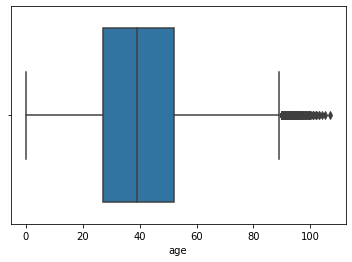

In [22]:
sns.boxplot(df['age'])
plt.show()

<AxesSubplot:ylabel='Frequency'>

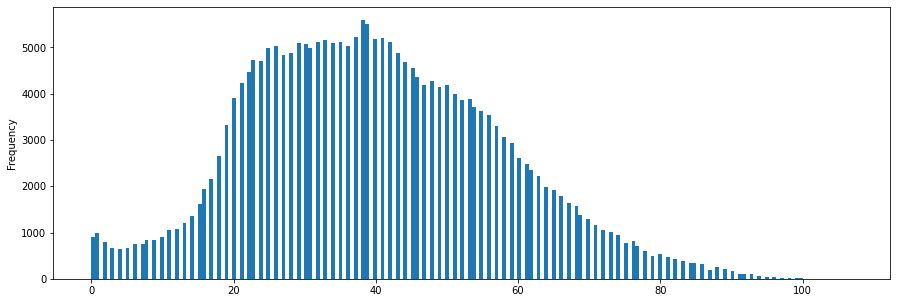

In [23]:
df.age.plot.hist(figsize=(15, 5), bins=200)

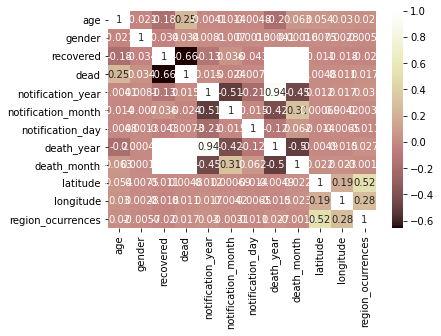

In [24]:
sns.heatmap(df.corr(), annot=True, cmap='pink')
plt.show()

/home/beelzebruno/.virtualenvs/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='notification_year', ylabel='count'>

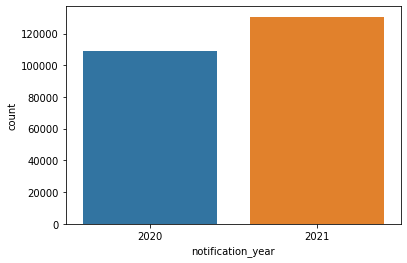

In [25]:
sns.countplot(df['notification_year'])

/home/beelzebruno/.virtualenvs/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='death_year', ylabel='count'>

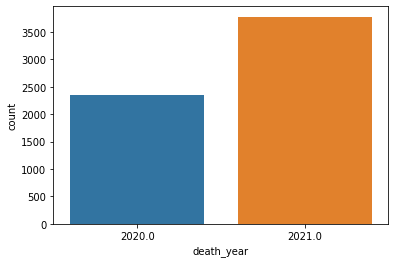

In [26]:
sns.countplot(df['death_year'])

/home/beelzebruno/.virtualenvs/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='death_month', ylabel='count'>

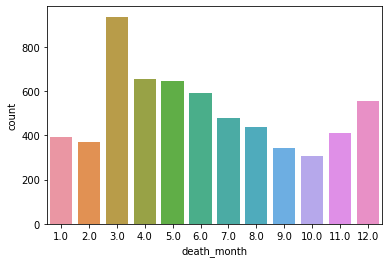

In [27]:
sns.countplot(df['death_month'])

/home/beelzebruno/.virtualenvs/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

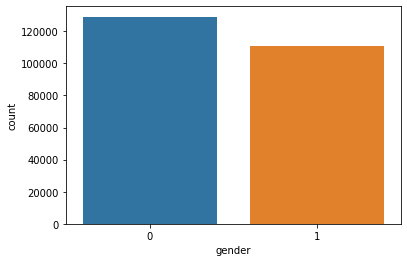

In [28]:
sns.countplot(df['gender'])

array([[<AxesSubplot:title={'center':'notification_date'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'death_date'}>],
       [<AxesSubplot:title={'center':'recovered'}>,
        <AxesSubplot:title={'center':'dead'}>,
        <AxesSubplot:title={'center':'notification_year'}>,
        <AxesSubplot:title={'center':'notification_month'}>],
       [<AxesSubplot:title={'center':'notification_day'}>,
        <AxesSubplot:title={'center':'death_year'}>,
        <AxesSubplot:title={'center':'death_month'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'region_ocurrences'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

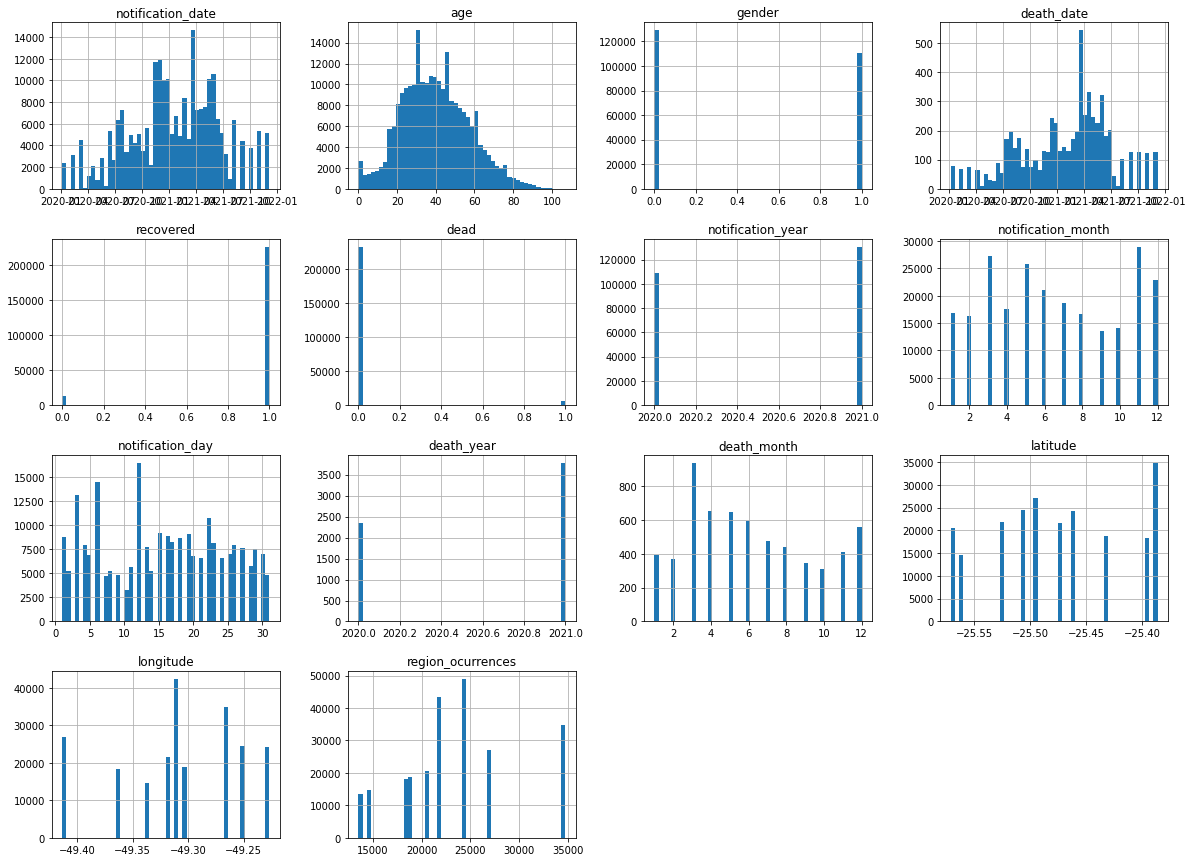

In [29]:
df.hist(bins=50, figsize=(20, 15))

In [30]:
# https://publicacoes.ifc.edu.br/index.php/metapre/article/view/1312/1020

In [31]:
parsed_df = df[['notification_year', 'notification_month', 'notification_day', 'recovered', 'dead']].copy()
dead_grouped_by_date = {}
infected_grouped_by_date = {}

for data_point in parsed_df.values:
    year, month, day = data_point[0], data_point[1], data_point[2]
    recovered, dead = data_point[3], data_point[4]
    key = f'{day}/{month}/{year}'

    if key in dead_grouped_by_date.keys():
        dead_grouped_by_date[key] += dead
    else:
        dead_grouped_by_date[key] = dead

    if key in infected_grouped_by_date.keys():
        infected_grouped_by_date[key] += 1
    else:
        infected_grouped_by_date[key] = 1


In [32]:
dead_count_avg = pd.DataFrame(dead_grouped_by_date.items(), columns=['date', 'count'])
dead_count_avg['date'] = pd.to_datetime(dead_count_avg.date)
dead_count_avg = dead_count_avg.sort_values(by="date")

infected_count_avg = pd.DataFrame(infected_grouped_by_date.items(), columns=['date', 'count'])
infected_count_avg['date'] = pd.to_datetime(infected_count_avg.date)
infected_count_avg = infected_count_avg.sort_values(by="date")


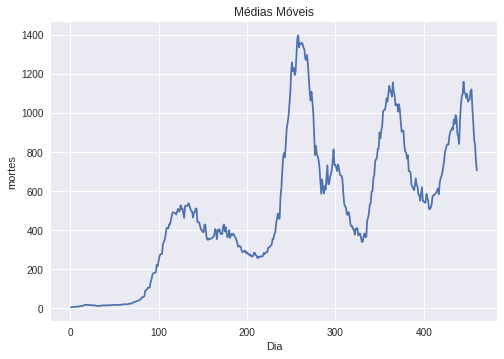

In [33]:
gap = 14
results = []
count = 0
while count < len(infected_count_avg) - gap + 1:
#     if int(str(new_df.date.values[count])[:4]) == 2020:
    group = infected_count_avg['count'].values[count : count + gap]
    group_avg = sum(group) / gap
    results.append(group_avg)

    count +=1

day_month = []
for day in range(1, len(results) + 1):
    day_month.append(day)

# Visualizar gráfico de médias móveis
plt.style.use('seaborn')
plt.xlabel('Dia')
plt.ylabel('mortes')
plt.title('Médias Móveis')

plt.plot(day_month, results)
plt.show()

In [34]:
infected_df = pd.DataFrame({'date': day_month, 'avg': results})
dead_df = pd.DataFrame({'date': day_month, 'avg': results})

In [35]:
infected_df.tail()

,date,avg
455,456,951.500000
456,457,864.642857
457,458,840.500000
458,459,753.785714
459,460,706.714286


In [36]:
dead_df.tail()

,date,avg
455,456,951.500000
456,457,864.642857
457,458,840.500000
458,459,753.785714
459,460,706.714286


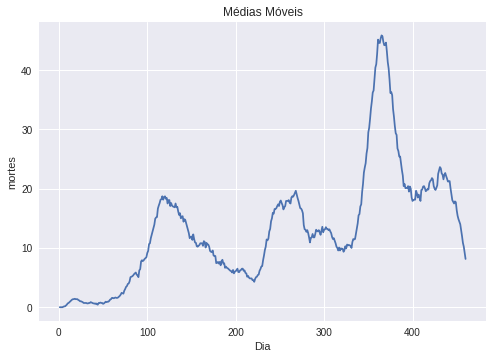

In [37]:
gap = 14
results = []
count = 0
while count < len(dead_count_avg) - gap + 1:
    group = dead_count_avg['count'].values[count : count + gap]
    group_avg = sum(group) / gap
    results.append(group_avg)

    count +=1

day_month = []
for day in range(1, len(results) + 1):
    day_month.append(day)

# Visualizar gráfico de médias móveis
plt.style.use('seaborn')
plt.xlabel('Dia')
plt.ylabel('mortes')
plt.title('Médias Móveis')

plt.plot(day_month, results)
plt.show()

<AxesSubplot:>

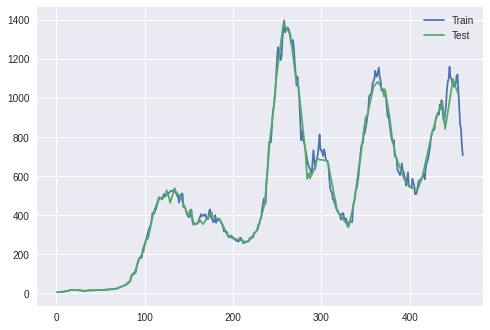

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    dead_df.date.values,
    dead_df['avg'].values
)

sns.lineplot(x=X_train, y=y_train, label='Train')
sns.lineplot(x=X_test, y=y_test, label='Test')

In [39]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Std deviation: ', scores.std())

In [40]:
# modelo de base
from sklearn.dummy import DummyRegressor
dr = DummyRegressor()
dr.fit(X_train, y_train)
dummy_preds = dr.predict(X_test)
print(dr.score(X_test, y_test))

-0.030709540342012343


<AxesSubplot:>

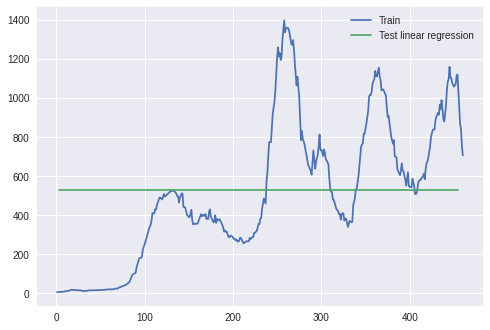

In [41]:
sns.lineplot(x=X_train, y=y_train, label='Train')
sns.lineplot(x=X_test, y=dummy_preds, label='Test linear regression')

In [42]:
lin_reg = LinearRegression()
lin_reg.fit(X_train.reshape(-1, 1), y_train)

predictions = lin_reg.predict(X_test.reshape(-1, 1))
lin_mse = mean_squared_error(y_test, predictions)
lin_rmse = np.sqrt(lin_mse)

lin_reg_scores = cross_val_score(lin_reg, X_test.reshape(-1, 1), y_test,
                         scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_reg_scores)

print(lin_rmse)
display_scores(lin_rmse_scores)

217.9183243115606
Scores:  [184.13930885 208.48338051 183.90281706 360.85396311 199.44113683
 133.66587753 166.90572445 276.37714939 184.19402352 227.01101664]
Mean:  212.49743978872007
Std deviation:  60.99462113156754


<AxesSubplot:>

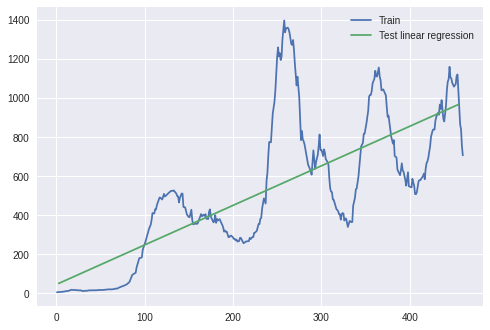

In [43]:
sns.lineplot(x=X_train, y=y_train, label='Train')
sns.lineplot(x=X_test, y=predictions, label='Test linear regression')

In [44]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train.reshape(-1, 1), y_train)

tree_predictions = tree_reg.predict(X_test.reshape(-1, 1))

tree_mse = mean_squared_error(y_test, tree_predictions)
tree_rmse = np.sqrt(tree_mse)

scores = cross_val_score(tree_reg, X_test.reshape(-1, 1), y_test,
                         scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

print(tree_rmse)
display_scores(tree_rmse_scores)

30.91741582987105
Scores:  [45.34188439 87.7379224  41.99279174 81.0365249  51.35804109 67.54553539
 60.47453043 25.84032961 62.17341762 55.34850372]
Mean:  57.8849481288196
Std deviation:  17.410916568216226


<AxesSubplot:>

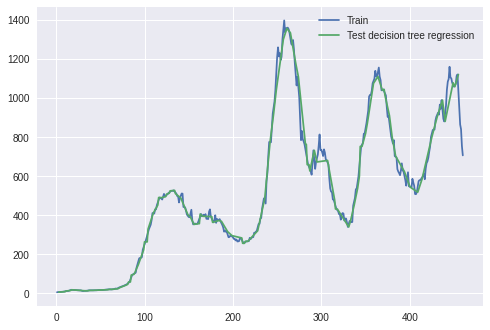

In [45]:
sns.lineplot(x=X_train, y=y_train, label='Train')
sns.lineplot(x=X_test, y=tree_predictions, label='Test decision tree regression')

In [46]:
forest_reg = DecisionTreeRegressor()
forest_reg.fit(X_train.reshape(-1, 1), y_train)
forest_predictions = forest_reg.predict(X_test.reshape(-1, 1))

forest_mse = mean_squared_error(y_test, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_scores = cross_val_score(forest_reg, X_test.reshape(-1, 1), y_test,
                         scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-forest_scores)

print(forest_rmse)
display_scores(tree_rmse_scores)

30.91741582987105
Scores:  [45.34188439 87.7379224  41.99279174 81.0365249  51.35804109 67.54553539
 60.47453043 25.84032961 62.17341762 55.34850372]
Mean:  57.8849481288196
Std deviation:  17.410916568216226


<AxesSubplot:>

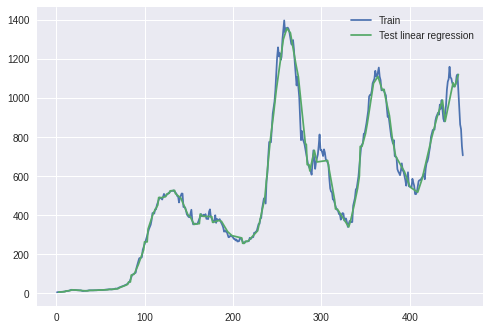

In [47]:
sns.lineplot(x=X_train, y=y_train, label='Train')
sns.lineplot(x=X_test, y=forest_predictions, label='Test linear regression')

In [48]:
svr = SVR()
svr.fit(X_train.reshape(-1, 1), y_train)
svr_preds = svr.predict(X_test.reshape(-1, 1))

print(metrics.r2_score(y_test, svr_preds))
print(svr.score(X_test.reshape(-1, 1), y_test))
print(metrics.mean_absolute_error(y_test, svr_preds))

NameError: name 'SVR' is not defined

In [ ]:
sns.lineplot(x=X_train, y=y_train, label='Train')
sns.lineplot(x=X_test, y=svr_preds, label='Test linear regression')

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
    activation='logistic',
    learning_rate_init=0.01,
    random_state=1, max_iter=500).fit(X_train.reshape(-1, 1), y_train)
mlp_preds = mlp.predict(X_test.reshape(-1, 1))

print(metrics.r2_score(y_test, mlp_preds))
print(svr.score(X_test.reshape(-1, 1), y_test))
print(metrics.mean_absolute_error(y_test, mlp_preds))

In [ ]:
sns.lineplot(x=X_train, y=y_train, label='Train')
sns.lineplot(x=X_test, y=mlp_preds, label='Test linear regression')

In [ ]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('std_scaler', StandardScaler())
])
transformed_X_train = num_pipeline.fit_transform(X_train.reshape(-1, 1))
transformed_X_test = num_pipeline.fit_transform(X_test.reshape(-1, 1))

transformed_y_train = num_pipeline.fit_transform(y_train.reshape(-1, 1))
transformed_y_test = num_pipeline.fit_transform(y_test.reshape(-1, 1))

In [ ]:
%%capture
param_grid = [{'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100]}]
grid_search = GridSearchCV(lin_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(transformed_X_train, transformed_y_train)

In [ ]:
grid_search.best_params_

In [ ]:
lin_reg = LinearRegression(n_jobs=1)
lin_reg.fit(transformed_X_train, transformed_y_train)

predictions = lin_reg.predict(transformed_X_test)
lin_mse = mean_squared_error(transformed_y_test, predictions)
lin_rmse = np.sqrt(lin_mse)

lin_reg_scores = cross_val_score(lin_reg, transformed_X_test, transformed_y_test,
                         scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_reg_scores)

print(lin_rmse)
display_scores(lin_rmse_scores)

In [ ]:
sns.lineplot(x=X_train, y=y_train, label='Train')
sns.lineplot(x=X_test, y=predictions.reshape(-1),
             label='Linear regression with scaled data')

In [ ]:
%%capture
param_grid = [
    {
        'C': [2.0, 2.1, 2.2, 2.5, 2.7, 3.0, 4.0, 5.0, 50],
        'degree': [-1, 1, 1.5, 2, 3, 4, 5],
        'epsilon': [0.1, 0.2, 0.3, 0.5, 0.7]
    },
]

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(transformed_X_train2, transformed_y_train2)

In [ ]:
grid_search.best_params_

In [ ]:
svr = SVR(C=50, degree=1, epsilon=0.3).fit(transformed_X_train, transformed_y_train)
svr_preds = svr.predict(transformed_X_test)

print(metrics.r2_score(transformed_y_test, svr_preds))
print(svr.score(transformed_X_test, transformed_y_test))
print(metrics.mean_absolute_error(transformed_y_test, svr_preds))

In [ ]:
sns.lineplot(x=X_train, y=y_train, label='Train')
sns.lineplot(x=X_test, y=svr_preds,
             label='SVR regression with scaled data')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    dead_df.date.values,
    dead_df['avg'].values
)

sns.lineplot(x=X_train, y=y_train, label='Train')
sns.lineplot(x=X_test, y=y_test, label='Test')

In [ ]:
lin_reg.fit(X_train.reshape(-1, 1), y_train)
y = lin_reg.predict(np.arange(0, 700).reshape(-1, 1))
ry = forest_reg.fit(X_train.reshape(-1, 1), y_train).predict(np.arange(0, 700).reshape(-1, 1))


In [ ]:
forest_reg = DecisionTreeRegressor()
forest_reg.fit(X_train.reshape(-1, 1), y_train)
forest_predictions = forest_reg.predict(X_test.reshape(-1, 1))

forest_mse = mean_squared_error(y_test, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

forest_scores = cross_val_score(forest_reg, X_test.reshape(-1, 1), y_test,
                         scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-forest_scores)
display_scores(tree_rmse_scores)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    infected_df.date.values,
    infected_df['avg'].values
)

lin_reg.fit(X_train.reshape(-1, 1), y_train)
y = lin_reg.predict(np.arange(0, 700).reshape(-1, 1))
ry = forest_reg.fit(X_train.reshape(-1, 1), y_train).predict(np.arange(0, 700).reshape(-1, 1))

sns.lineplot(x=X_train, y=y_train, label='Train')
sns.lineplot(x=np.arange(0, 700), y=y, label='Test linear regression')
sns.lineplot(x=np.arange(0, 700), y=ry, label='Test random forest')

In [ ]:
lin_reg_scores = cross_val_score(lin_reg, X_test.reshape(-1, 1), y_test,
                         scoring='neg_mean_squared_error', cv=25)
lin_rmse_scores = np.sqrt(-lin_reg_scores)
display_scores(lin_rmse_scores)

In [ ]:
forest_reg = DecisionTreeRegressor()
forest_reg.fit(X_train.reshape(-1, 1), y_train)
forest_predictions = forest_reg.predict(X_test.reshape(-1, 1))

forest_mse = mean_squared_error(y_test, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

forest_scores = cross_val_score(forest_reg, X_test.reshape(-1, 1), y_test,
                         scoring='neg_mean_squared_error', cv=25)
tree_rmse_scores = np.sqrt(-forest_scores)
display_scores(tree_rmse_scores)

In [ ]:
lr = LinearRegression(fit_intercept=True, n_jobs=1)
lr.fit(X_train.reshape(-1, 1), y_train)
lr.score(X_test.reshape(-1, 1), y_test)

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train.reshape(-1, 1), y_train)
rf.score(X_test.reshape(-1, 1), y_test)

In [ ]:
metrics.mean_absolute_error(transformed_y_test, rf.predict(X_test.reshape(-1, 1)))

In [ ]:
from sklearn.svm import SVR

In [ ]:
from sklearn import metrics
lr_preds = lr.predict(X_test.reshape(-1, 1))
metrics.r2_score(y_test, lr_preds)

In [ ]:
metrics.mean_absolute_error(y_test, lr_preds)

In [ ]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('std_scaler', StandardScaler())
])
transformed_X_train = num_pipeline.fit_transform(X_train.reshape(-1, 1))
transformed_X_test = num_pipeline.fit_transform(X_test.reshape(-1, 1))

transformed_y_train = num_pipeline.fit_transform(y_train.reshape(-1, 1))
transformed_y_test = num_pipeline.fit_transform(y_test.reshape(-1, 1))

In [ ]:

lr = LinearRegression().fit(transformed_X_train, transformed_y_train)
lr_preds = lr.predict(transformed_X_test)
metrics.r2_score(transformed_y_test, lr_preds)

In [ ]:
metrics.mean_absolute_error(transformed_y_test, lr_preds)

In [ ]:
rf = RandomForestRegressor().fit(transformed_X_train, transformed_y_train)
rf_preds = rf.predict(transformed_X_test)
metrics.r2_score(transformed_y_test, rf_preds)

In [ ]:
metrics.mean_absolute_error(transformed_y_test, rf_preds)

In [ ]:
svr = SVR().fit(transformed_X_train, transformed_y_train)
svr_preds = svr.predict(transformed_X_test)
svr.score(transformed_y_test, svr_preds)

In [ ]:
%%capture
param_grid = [
    {'n_estimators': [3, 10, 30]},
    {'bootstrap': [False], 'n_estimators': [3, 10]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(transformed_X_train, transformed_y_train)

In [ ]:
grid_search.best_params_

In [ ]:
rf = RandomForestRegressor(n_estimators=30).fit(transformed_X_train, transformed_y_train)
rf_preds = rf.predict(transformed_X_test)
metrics.r2_score(transformed_y_test, rf_preds)

In [ ]:
%%capture
# supress output
param_grid = [
    {
        'C': [2.0, 2.1, 2.2, 2.5, 2.7, 3.0, 4.0, 5.0, 50],
        'degree': [-1, 1, 1.5, 2, 3, 4, 5],
        'epsilon': [0.1, 0.2, 0.3, 0.5, 0.7]
    },
]

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(transformed_X_train, transformed_y_train)

In [ ]:
grid_search.best_params_

In [ ]:
svr = SVR(C=50, degree=1, epsilon=0.3)
svr.fit(transformed_X_train, transformed_y_train)
svr_preds = svr.predict(transformed_X_test)
svr.score(transformed_y_test, svr_preds)

In [ ]:
param_grid = [{'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100]}]

grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(transformed_X_train, transformed_y_train)

In [ ]:
grid_search.best_params_

In [ ]:
X = dead_df['date'].values
y = dead_df['avg'].values

train_length = int(len(dead_df)*0.7)
test_length = len(dead_df) - train_length

X_train = X[0:train_length]
y_train = y[0:train_length]

X_test = X[train_length:len(dead_df)]
y_test = y[train_length:len(dead_df)]

sns.lineplot(x=X_train, y=y_train, label='Train')
sns.lineplot(x=X_test, y=y_test, label='Test')

In [ ]:
#### 
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('std_scaler', StandardScaler())
])
transformed_X_train2 = num_pipeline.fit_transform(X_train.reshape(-1, 1))
transformed_X_test2 = num_pipeline.fit_transform(X_test.reshape(-1, 1))

transformed_y_train2 = num_pipeline.fit_transform(y_train.reshape(-1, 1))
transformed_y_test2 = num_pipeline.fit_transform(y_test.reshape(-1, 1))


In [ ]:
lr = LinearRegression().fit(transformed_X_train2, transformed_y_train2)
lr_preds = lr.predict(transformed_X_test2)
print(metrics.r2_score(transformed_y_test2, lr_preds))
print(metrics.mean_absolute_error(transformed_y_test2, lr_preds))

In [ ]:
rf = RandomForestRegressor().fit(transformed_X_train2, transformed_y_train2)
rf_preds = rf.predict(transformed_X_test2)
print(metrics.r2_score(transformed_y_test2, rf_preds))
print(metrics.mean_absolute_error(transformed_y_test2, rf_preds))

In [ ]:
svr = SVR().fit(transformed_X_train2, transformed_y_train2)
svr_preds = rf.predict(transformed_X_test2)
print(svr.score(transformed_y_test2, svr_preds))
print(metrics.mean_absolute_error(transformed_y_test2, svr_preds))

In [ ]:
%%capture  # supress output
param_grid = [
    {'n_estimators': [3, 10, 30]},
    {'bootstrap': [False], 'n_estimators': [3, 10]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(transformed_X_train2, transformed_y_train2)

In [ ]:
grid_search.best_params_

In [ ]:
rf = RandomForestRegressor(n_estimators=10).fit(transformed_X_train2, transformed_y_train2)
rf_preds = rf.predict(transformed_X_test2)
print(metrics.r2_score(transformed_y_test2, rf_preds))
print(metrics.mean_absolute_error(transformed_y_test2, rf_preds))

In [ ]:
%%capture  # supress output
param_grid = [
    {
        'C': [2.0, 2.1, 2.2, 2.5, 2.7, 3.0, 4.0, 5.0, 50],
        'degree': [-1, 1, 1.5, 2, 3, 4, 5],
        'epsilon': [0.1, 0.2, 0.3, 0.5, 0.7]
    },
]

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(transformed_X_train2, transformed_y_train2)

In [ ]:
grid_search.best_params_

In [ ]:
svr = SVR(C=50, degree=1, epsilon=0.3).fit(transformed_X_train2, transformed_y_train2)
svr_preds = rf.predict(transformed_X_test2)
print(svr.score(transformed_y_test2, svr_preds))
print(metrics.mean_absolute_error(transformed_y_test2, svr_preds))

In [ ]:
X = infected_df['date'].values
y = infected_df['avg'].values

train_length = int(len(infected_df)*0.7)
test_length = len(infected_df) - train_length

X_train = X[0:train_length]
y_train = y[0:train_length]

X_test = X[train_length:len(infected_df)]
y_test = y[train_length:len(infected_df)]

sns.lineplot(x=X_train, y=y_train, label='Train')
sns.lineplot(x=X_test, y=y_test, label='Test')

## Referências

<hr />

CURITIBA, Prefeitura Municipal de. **Endereços da Vigilância Sanitária Municipal**. 2021. Online, disponível em: <https://www.curitiba.pr.gov.br/servicos/enderecos-da-vigilancia-sanitaria-municipal/729> Último acesso em: 21/07/2021;

GUIZELINI, Dieval et al. Algoritmos Genéticos e média móvel para ajuste da curva de predição da infecção por SARS-Cov-2. In: Algoritmos Genéticos e média móvel para ajuste da curva de predição da infecção por SARS-Cov-2. [S. l.], 2020. Disponível em: https://www.bioinfo.ufpr.br/covid19/index.html. Acesso em: 22 jul. 2021.

OLIVEIRA, Alcides Augusto Souto de. **Casos de COVID-19 em Curitiba**. Prefeitura de Curitiba - Dados abertos, 2021; Online: Disponível em: <https://www.curitiba.pr.gov.br/dadosabertos/busca/?pagina=2> Último acesso em: 21/07/2021;

RIZZATTI, Maurício et al. MAPEAMENTO DA COVID-19 POR MEIO DA DENSIDADE DE KERNEL. Metodologias e Aprendizado, [S. l.], v. 3, p. 44-53, 24 maio 2020. DOI https://doi/10.21166/metapre.v3i0.1312. Disponível em: https://publicacoes.ifc.edu.br/index.php/metapre/article/view/1312/1020. Acesso em: 22 jul. 2021.

